In [1]:
import pandas as pd
import numpy as np
from src.utils import load_json
from collections import defaultdict

In [2]:
sp_ops_raw = load_json("../data/sp_ops/known_rxns_swissprot_enzymes_240310.json")
imt_ops = pd.read_csv("../data/sp_ops/JN3604IMT_rules.tsv", sep='\t')
min_ops = pd.read_csv("../data/sp_ops/minimal1224_all_uniprot.tsv", sep='\t')

In [5]:
len(sp_ops_raw), sp_ops_raw['R1b14b079add4f5306e5f50c276a3b0ffae6b7856d3703740c5478c69713b4458']

(20382,
 {'smarts': 'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1>>NC(=O)c1cccnc1.Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OP(=O)(O)OCC3OC(OC1C2O)C(O)C3O',
  'imt_rules': [],
  'enzymes': [['A0A009IHW8',
    'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR',
    1.0,
    'Evidence at protein level',
    'reviewed',
    'Acinetobacter baumannii (strain 1295743)']],
  'db_entries': [['rhea', 75301], ['rhea', 75300]],
  'reverse': 'R16bcd71a77b7fd97bf2aca7eed3d08cb04719de80c312d055f27074b84bb8e54'})

In [3]:
id2seq = defaultdict(set)
for _, elt in sp_ops_raw.items():
    if elt['imt_rules'] and elt['enzymes']:
        for e in elt['enzymes']:
                id2seq[e[0]].add(e[1])

# Make sure only one seq per id
for k,v in id2seq.items():
     if len(v) > 1:
          print(k,v)

id2rule = defaultdict(set)
for _, elt in sp_ops_raw.items():
    if elt['imt_rules'] and elt['enzymes']:
        for e in elt['enzymes']:
            for r in elt['imt_rules']:
                 id2rule[e[0]].add(r)

print(set(id2rule.keys()) ^ set(id2seq.keys())) # Make sure these are the same

data = {'Entry':[], 'Label':[], 'Sequence':[]}
for id in id2seq.keys():
     data['Entry'].append(id)
     data['Label'].append(";".join(id2rule[id]))
     data['Sequence'].append(list(id2seq[id])[0])

# Save to sp_ops subdir

df = pd.DataFrame(data=data)
df.to_csv("../data/sp_ops/sp_ops.csv", index=False, sep='\t')
df.head()

set()


,Entry,Label,Sequence
0,A1Z1Q3,rule0310_1;rule0007_197;rule0007_198;rule0006_...,MYPSNKKKKVWREEKERLLKMTLEERRKEYLRDYIPLNSILSWKEE...
1,A0A009IHW8,rule0310_1;rule0311_1,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
2,A0A024B7W1,rule0010_65;rule0011_51;rule0120_1;rule0121_1,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
3,A0A059TC02,rule0142_1;rule0143_2,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...
4,A0A061AE05,rule0015_34;rule0014_29,MLTPRDENNEGDAMPMLKKPRYSSLSGQSTNITYQEHTISREERAA...


In [37]:
from src.utils import construct_sparse_adj_mat

y, idx_sample, idx_feature = construct_sparse_adj_mat("sp_ops")

Constructing sp_ops sparse adjacency matrix


In [6]:
y.shape

(3660, 2271)

In [5]:
min_ops.head()

,Name,Reactants,SMARTS,Products,Comments
0,rule0001,Any;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;Any,A0A060PLD9;A0A0P0YNP7;A0A0P9RZM9;A1XCQ0;A3E242...
1,rule0002,Any;NAD_CoF,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,NADH_CoF;Any,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
2,rule0003,NADH_CoF;Any,[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,Any;NAD_CoF,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
3,rule0004,Any;NADH_CoF;O2,[#6:1].[#6:2]1=[#6:3]-[#7:4]-[#6:5]=[#6:6]-[#6...,Any;NAD_CoF;WATER,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
4,rule0005,Any;NAD_CoF;WATER,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,Any;NADH_CoF;O2,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...


In [6]:
op2 = min_ops.loc[1, "SMARTS"]
op3 = min_ops.loc[2, "SMARTS"]
print(op2)
print(op3)

[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7+:7]:[#6:8]:1>>[#6:3]1=[#6:8]-[#7+0:7]-[#6:6]=[#6:5]-[#6:4]-1.[#6:1]=[#8:2]
[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[#6:7]=[#8:8]>>[#6:7]-[#8:8].[#6:1]1:[#6:6]:[#6:5]:[#6:4]:[#7+:3]:[#6:2]:1


In [16]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole

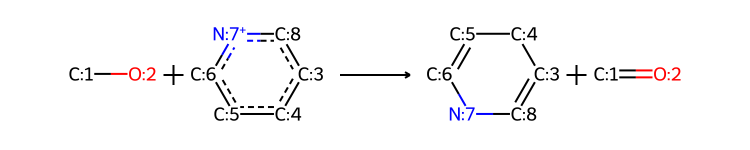

In [17]:
AllChem.ReactionFromSmarts(op2)

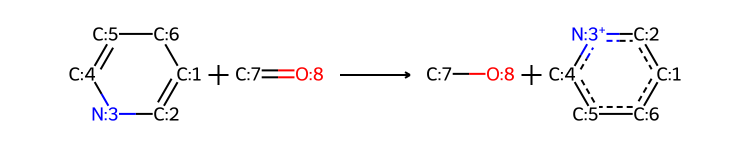

In [18]:
AllChem.ReactionFromSmarts(op3)

In [13]:
minfromimt = [elt.split('_')[0] for elt in imt_ops.loc[:, "Name"]]
from collections import Counter
ct_min = Counter(minfromimt)
ct_min['rule0002'], ct_min['rule0003']

(154, 177)

In [22]:
imt_ops.loc[100]

Name                                              rule0002_011
Reactants                                          Any;NAD_CoF
SMARTS       [#6;$([#6&R]1-&@[#6&R]-&@[#6&R]-&@[#6&R]2(-&@[...
Products                                          NADH_CoF;Any
Comments                                                   NaN
Name: 100, dtype: object

In [26]:
op_labels = [sorted(elt.split(';')) for elt in df.loc[:, "Label"].tolist()]
op_labels

[['rule0006_169',
  'rule0006_177',
  'rule0006_183',
  'rule0007_187',
  'rule0007_195',
  'rule0007_197',
  'rule0007_198',
  'rule0310_1',
  'rule0311_1'],
 ['rule0310_1', 'rule0311_1'],
 ['rule0010_65', 'rule0011_51', 'rule0120_1', 'rule0121_1'],
 ['rule0142_1', 'rule0143_2'],
 ['rule0014_29', 'rule0015_34'],
 ['rule0007_190', 'rule0036_29', 'rule0037_42', 'rule0125_5'],
 ['rule0036_29', 'rule0037_42', 'rule0767_3', 'rule0768_2'],
 ['rule0008_36', 'rule0009_39'],
 ['rule0142_1', 'rule0143_2'],
 ['rule0114_2'],
 ['rule0114_2'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0014_24', 'rule0015_29'],
 ['rule0012_258', 'rule0013_62'],


In [45]:
op10_65 = imt_ops.loc[imt_ops["Name"] == 'rule0010_65', "SMARTS"].item()
op11_51 = imt_ops.loc[imt_ops["Name"] == 'rule0011_51', "SMARTS"].item()
op11_50 = imt_ops.loc[imt_ops["Name"] == 'rule0011_50', "SMARTS"].item()

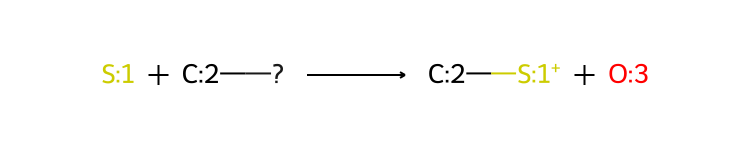

In [43]:
AllChem.ReactionFromSmarts(op10_65)

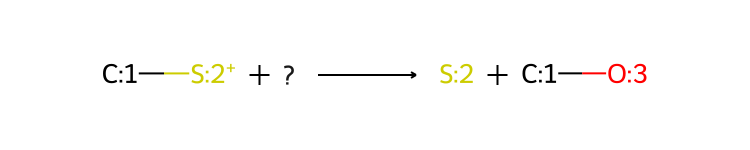

In [46]:
AllChem.ReactionFromSmarts(op11_51)

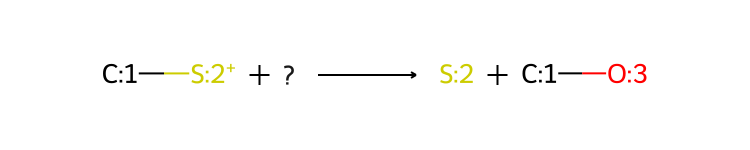

In [47]:
AllChem.ReactionFromSmarts(op11_50)

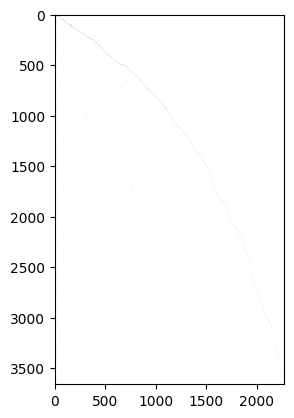

In [41]:
import matplotlib.pyplot as plt

plt.imshow(y.toarray(), cmap='binary')

In [49]:
y.count_nonzero() / (y.shape[0] * y.shape[1])

0.0010321396173660288

In [2]:
import numpy as np
list(zip(*np.eye(3).nonzero()))

[(0, 0), (1, 1), (2, 2)]